In [1]:
import os
import json
import numpy as np
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from pysheds.grid import Grid
from matplotlib import colors
import seaborn as sns
import warnings
from swmmtoolbox import swmmtoolbox
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore')
sns.set()

%matplotlib inline

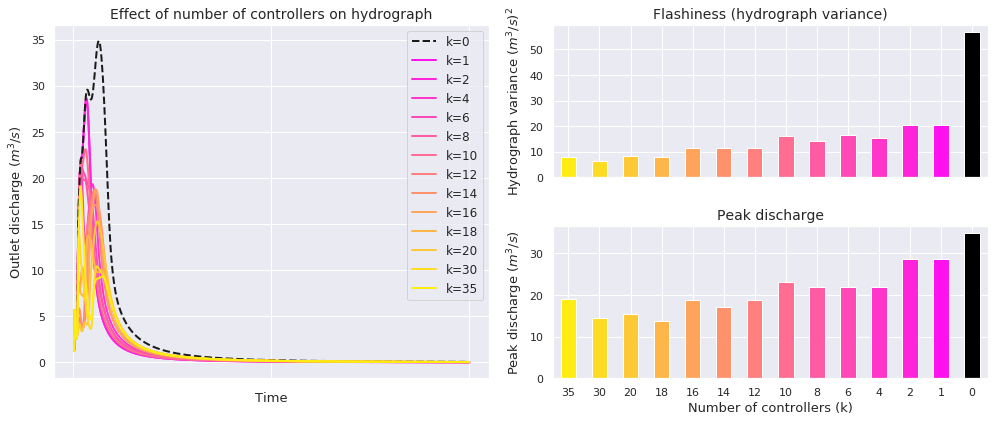

In [2]:
ks = (1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 35)
sns.set_palette('spring', len(ks))
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 2)

ax0 = plt.subplot(gs[:, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 1])

output_dir = '../data/out'
var = {}
maxes = {}

outfall = swmmtoolbox.extract('../data/out/uncontrolled_16.87mm.out',
                              'system,Flow_leaving_outfalls,11').iloc[:,0]
outfall.name = 'k=0'
outfall.plot(ax=ax0, color='k', linestyle='--', zorder=11, linewidth=2)
var[0] = outfall.var()
maxes[0] = outfall.max()

for k in ks:
    outfall = swmmtoolbox.extract('../data/out/linear_k{0}_50pct_phi50_16.87mm.out'.format(k),
                                  'system,Flow_leaving_outfalls,11').iloc[:,0]
    outfall.name = 'k={0}'.format(k)
    outfall.plot(ax=ax0, zorder=int(k), alpha=1, linewidth=2)
    var[k] = outfall.var()
    maxes[k] = outfall.max()
    
var = pd.Series(var).sort_index(ascending=False)
maxes = pd.Series(maxes).sort_index(ascending=False)
color_dict = dict(zip(ks, sns.color_palette('spring', len(ks))))
color_dict.update({0 : [0.0,0.0,0.0]})
colors = [color_dict[i] for i in var.index]
var.index = var.index.astype(str)
var.plot(ax=ax1, kind='bar', colors=colors, rot=0)
maxes.index = maxes.index.astype(str)
maxes.plot(ax=ax2, kind='bar', colors=colors, rot=0)
ax0.set_xlabel('Time', size=13)
ax2.set_xlabel('Number of controllers (k)', size=13)

ax0.legend(fontsize=12)
ax0.get_xaxis().set_ticklabels([])
ax1.get_xaxis().set_ticklabels([])
ax0.set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax0.minorticks_off()
ax0.set_title('Effect of number of controllers on hydrograph', size=14)
ax1.set_title('Flashiness (hydrograph variance)', size=14)
ax2.set_title('Peak discharge', size=14)
ax1.set_ylabel(r'Hydrograph variance $(m^3/s)^2$', size=13)
ax2.set_ylabel(r'Peak discharge ($m^3/s$)', size=13)
plt.tight_layout()
#plt.savefig('../img/hydrograph_num_controllers_vert.png', bbox_inches='tight', dpi=200)


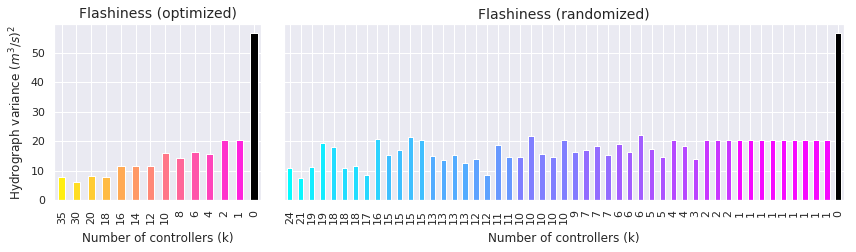

In [4]:
ks = (1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 35)
sns.set_palette('inferno', len(ks))
fig = plt.figure(figsize=(12, 3.6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.7])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

output_dir = '../data/out'
var_l = {}
var_n = []
var_n_labels = []

outfall = swmmtoolbox.extract('../data/out/uncontrolled_16.87mm.out',
                              'system,Flow_leaving_outfalls,11').iloc[:,0]
outfall.name = 'k=0'
var_l[0] = outfall.var()
var_n.append(outfall.var())
var_n_labels.append(0)

for k in ks:
    outfall = swmmtoolbox.extract('../data/out/linear_k{0}_50pct_phi50_16.87mm.out'.format(k),
                                  'system,Flow_leaving_outfalls,11').iloc[:,0]
    outfall.name = 'k={0}'.format(k)
    var_l[k] = outfall.var()

for fn in os.listdir(output_dir):
    if (('naive') in fn) and ('50pct' in fn) and ('16.87mm' in fn) and (not 'under' in fn):
        outfall = swmmtoolbox.extract(os.path.join(output_dir, fn), 'system,Flow_leaving_outfalls,11').iloc[:,0]
        k = int(fn.split('_k')[1].split('_')[0])
        outfall.name = 'k={0}'.format(k)
        var_n.append(outfall.var())
        var_n_labels.append(k)
    
var_l = pd.Series(var_l).sort_index(ascending=False)
var_n = pd.Series(var_n, index=var_n_labels).sort_index(ascending=False)

color_dict = dict(zip(var_l.index, sns.color_palette('spring_r', len(var_l.index))))
color_dict.update({0 : [0.0,0.0,0.0]})
colors = [color_dict[i] for i in var_l.index]
var_l.plot(ax=ax0, kind='bar', colors=colors, rot=90)
color_dict = dict(zip(var_n.index, sns.color_palette('cool', len(var_n.index))))
color_dict.update({0 : [0.0,0.0,0.0]})
colors = [color_dict[i] for i in var_n.index]
var_n.plot(ax=ax1, kind='bar', colors=colors, rot=90)
ax0.set_title('Flashiness (optimized)', size=14)
ax1.set_title('Flashiness (randomized)', size=14)
ax0.set_ylabel(r'Hydrograph variance $(m^3/s)^2$', size=12)
ax0.set_xlabel('Number of controllers (k)', size=12, labelpad=8)
ax1.set_xlabel('Number of controllers (k)', size=12, labelpad=8)
ax1.yaxis.set_ticklabels([])
plt.tight_layout()
#plt.savefig('../img/num_controllers_comparison_var.png', bbox_inches='tight', dpi=200)


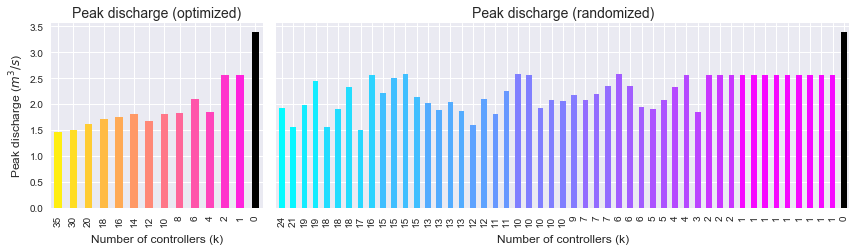

In [4]:
ks = (1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 35)
sns.set_palette('inferno', len(ks))
fig = plt.figure(figsize=(12, 3.6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.7])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

output_dir = '../data/out'
max_l = {}
max_n = []
max_n_labels = []

outfall = swmmtoolbox.extract('../data/out/uncontrolled_diff_1.5in.out',
                              'system,Flow_leaving_outfalls,11').iloc[:,0]
outfall.name = 'k=0'
max_l[0] = outfall.max()
max_n.append(outfall.max())
max_n_labels.append(0)

for k in ks:
    outfall = swmmtoolbox.extract('../data/out/linear_k{0}_50pct_phi10_diff_1.5in.out'.format(k),
                                  'system,Flow_leaving_outfalls,11').iloc[:,0]
    outfall.name = 'k={0}'.format(k)
    max_l[k] = outfall.max()

for fn in os.listdir(output_dir):
    if (('naive') in fn) and ('50pct' in fn) and ('1.5in' in fn):
        outfall = swmmtoolbox.extract(os.path.join(output_dir, fn), 'system,Flow_leaving_outfalls,11').iloc[:,0]
        k = int(fn.split('_k')[1].split('_')[0])
        outfall.name = 'k={0}'.format(k)
        max_n.append(outfall.max())
        max_n_labels.append(k)
    
max_l = pd.Series(max_l).sort_index(ascending=False)
max_n = pd.Series(max_n, index=max_n_labels).sort_index(ascending=False)

color_dict = dict(zip(max_l.index, sns.color_palette('spring_r', len(max_l.index))))
color_dict.update({0 : [0.0,0.0,0.0]})
colors = [color_dict[i] for i in max_l.index]
max_l.plot(ax=ax0, kind='bar', colors=colors, rot=90)
color_dict = dict(zip(max_n.index, sns.color_palette('cool', len(max_n.index))))
color_dict.update({0 : [0.0,0.0,0.0]})
colors = [color_dict[i] for i in max_n.index]
max_n.plot(ax=ax1, kind='bar', colors=colors, rot=90)
ax0.set_title('Peak discharge (optimized)', size=14)
ax1.set_title('Peak discharge (randomized)', size=14)
ax0.set_ylabel(r'Peak discharge ($m^3/s$)', size=12)
ax0.set_xlabel('Number of controllers (k)', size=12, labelpad=8)
ax1.set_xlabel('Number of controllers (k)', size=12, labelpad=8)
ax1.yaxis.set_ticklabels([])
plt.tight_layout()

plt.savefig('../img/num_controllers_comparison_max.png', bbox_inches='tight', dpi=200)
